# Assignment-1 Linear Programming
  The objective of this assignment is to show the applications of linear programming in real life problems. You will be asked to solve problems from classical physics to puzzles. 

## Instructions 
  - For each question you need to write the formulation in markdown and solve the problem using `cvxpy`. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file 

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
1. Sudoku 
2. Best Polyhedron 
3. Largest Ball
4. Illumination Problem
5. Jigsaw Puzzle 

In [3]:
# Installation dependencies
!pip3 install numpy==1.18.1 matplotlib==3.1.3 scipy==1.4.1 sklearn
!pip3 install cvxpy==1.0.25 scikit-image==0.16.2

  Stored in directory: C:\Users\aniru\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [1]:
pip install cvxopt

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Compatibility imports
from __future__ import print_function, division

# Imports
import os 
import sys
import random

import numpy as np 
import cvxpy as cp 
 
import matplotlib.pyplot as plt 

# Modules specific to problems 
from sklearn.datasets import make_circles # For problem 2 (Best Polyhedron) 
from scipy.spatial import ConvexHull # For problem 3 (Largest Ball in Polyhedron)
from scipy.linalg import null_space # For problem 4 (Illumination)
import matplotlib.cbook as cbook # For problem 5 (Jigsaw)
from skimage.transform import resize # For problem 5 (Jigsaw)
# matplotlib inline

## Question-1 Sudoku 
- In this problem you will develop a mixed integer programming algorithm, based upon branch and bound, to solve Sudoku puzzles as described in class.
- In particular, you need to implement the class SudokuSolver 

The function takes as input a Sudoku puzzle as a 9x9 “list of lists” of integers, i.e.,


    puzzle = [[4, 8, 0, 3, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 7, 1],
              [0, 2, 0, 0, 0, 0, 0, 0, 0],
              [7, 0, 5, 0, 0, 0, 0, 6, 0],
              [0, 0, 0, 2, 0, 0, 8, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 7, 6, 0, 0, 0],
              [3, 0, 0, 0, 0, 0, 4, 0, 0],
              [0, 0, 0, 0, 5, 0, 0, 0, 0]]

where zeros represent missing entries that must be assigned by your algorithm, and all other integers represent a known assignment. 

- The class SudokuSolver inherits the Sudoku class. You need to make changes **only** to the SudokuSolver class. Write function `plot` to plot the unsolved and solved puzzle. Write function `solve` to create our own solver, the function can get the unsolved puzzle as the input as should return a 9x9 numpy array (solved puzzle), where solved puzzle contains the input puzzle with all the zeros assigned to their correct values. For instance, for the above puzzle
this would be

    
    solved_puzzle = [[4, 8, 7, 3, 1, 2, 6, 9, 5],
                     [5, 9, 3, 6, 8, 4, 2, 7, 1],
                     [1, 2, 6, 5, 9, 7, 3, 8, 4],
                     [7, 3, 5, 8, 4, 9, 1, 6, 2],
                     [9, 1, 4, 2, 6, 5, 8, 3, 7],
                     [2, 6, 8, 7, 3, 1, 5, 4, 9],
                     [8, 5, 1, 4, 7, 6, 9, 2, 3],
                     [3, 7, 9, 1, 2, 8, 4, 5, 6],
                     [6, 4, 2, 9, 5, 3, 7, 1, 8]]
    

- You should write code to solve this problem using cvxpy.

**Write the code in SudokuSolver class only**. 

In [2]:
# Class Sudoku will generate new sudoku problems for you to solve. You cannot change this code. Complete the formulation and the solver below 
class Sudoku():
  def __init__(self):
    super(Sudoku,self).__init__()
    self.puzzle = None # Unsolved sudoku 
    self.solution = None # Store the solution here
    pass

  def construct_solution(self):
    """
      This function created a 9x9 solved sudoku example. 
      It can be used as a reference to see the performance of your solver.
    """
    while True: # until a solved sudoku puzzle if created
      puzzle = np.zeros((9,9))
      rows    = [set(range(1,10)) for i in range(9)] #   set of available
      columns = [set(range(1,10)) for i in range(9)] #   numbers for each
      squares = [set(range(1,10)) for i in range(9)] #   row, column and square

      try:
        for i in range(9): # for each roe
          for j in range(9): # for each column

            # Randomly choose a possible number for the location
            choices = rows[i].intersection(columns[j]).intersection(squares[(i//3)*3 + j//3])
            choice  = random.choice(list(choices))

            puzzle[i,j] = choice	# update the puzzle
            
            # Remove from the choice from row,column, square
            rows[i].discard(choice) 
            columns[j].discard(choice)
            squares[(i//3)*3 + j//3].discard(choice)

        # success! every cell is filled.
        return puzzle

      except IndexError:
        # if there is an IndexError, we have worked ourselves in a corner (we just start over)
        continue 
      
  def construct_problem(self,solution,n=28):
    """
      Construct the puzzle by removing a cell if it is possible to deduce a cell's value from the remaining cells 
      @param: n => minimum number of unplucked/remaining cells  
    """

    def canBeDeduced(puz, i, j, c): # check if the cell can be deduced from the remaining cells 
      v = puz[c//9,c%9]
      if puz[i,j] == v: return True
      if puz[i,j] in range(1,10): return False
        
      for m in range(9): # test row, col, square
        # if not the cell itself, and the mth cell of the group contains the value v, then "no"
        if not (m==c//9 and j==c%9) and puz[m,j] == v: return False
        if not (i==c//9 and m==c%9) and puz[i,m] == v: return False
        if not ((i//3)*3 + m//3==c//9 and (j//3)*3 + m%3==c%9) and puz[(i//3)*3 + m//3,(j//3)*3 + m%3] == v:
          return False

      return True


    cells = set(range(81))	
    cellsLeft = set(range(81))

    while len(cells) > n and len(cellsLeft): # Cells in the problem > n and cells left to be plucked > 0	
      cell = random.choice(list(cellsLeft)) # choose a random cell
      cellsLeft.discard(cell)

      # record whether another cell in these groups could also take
      # on the value we are trying to pluck
      row = col = square = False  

      for i in range(9): # For all numbers
        if i != cell/9: # can be deduced from the row
          if canBeDeduced(solution, i, cell%9, cell): row = True
        if i != cell%9: # can be deduced from the col
          if canBeDeduced(solution, cell//9, i, cell): col = True
        if not (((cell//9)//3)*3 + i//3 == cell//9 and ((cell//9)%3)*3 + i%3 == cell%9): # can be deduced from the square
          if canBeDeduced(solution, ((cell//9)//3)*3 + i//3, ((cell//9)%3)*3 + i%3, cell): square = True

      if row and col and square:
        continue # could not pluck this cell, try again.
      else:
        # this is a pluckable cell!
        solution[cell//9][cell%9] = 0 # 0 denotes a blank cell
        cells.discard(cell) # remove from the set of visible cells (pluck it)
        # we don't need to reset "cellsleft" because if a cell was not pluckable
        # earlier, then it will still not be pluckable now (with less information
        # on the board).

    return solution    

**Write the formulation of your solution here**

We solve this problem by constructing a $9$\*$9$\*$9$ occupancy grid, with each layer representing the occuppancy of a particular number. This occupancy is marked by a 1 in the position of occupation, and all the other spots are filled with 0s. This grid holds all our variable values. Let this be $x$. 

Our objective can be anything trivial, we only need all constraints to satisfy. I have chosen to use $max(sum(x))$, but any other objective function can be used as well. 

Therefore the problem is formulated as follows :

#### Objective : $max(sum(x))$
#### Constraints : 

1) All values of elements of x are integer.  

2) $$0\le x_{ijk} \le 1$$ $$\forall \: i,j,k \: \in [1, 9] $$

3) Each square must have only one value, therefore

$$\sum_{k=1}^9 x_{ijk}$$ $$\forall \: i,j \: \in [1, 9] $$

4) Each row must have each value only once, therefore

$$\sum_{j=1}^9 x_{ijk}$$ $$\forall \: i,k \: \in [1, 9] $$

5) Each column must have each value only once, therefore 

$$\sum_{i=1}^9 x_{ijk}$$ $$\forall \: j,k \: \in [1, 9] $$

6) Each three by three square must have every number exactly once. 

$$\sum_{i=1}^9 \sum_{j=1}^9 x(i+U,j+V,k)$$ $$ U,V \epsilon \{0,3,6\} $$ $$\forall \: k \: \in [1, 9] $$


In [3]:
# Create your sudoku puzzle solver here
class SudokuSolver(Sudoku):
  def __init__(self):
    super(SudokuSolver,self).__init__()
    self.solution = self.construct_solution() # Store the solution here
    self.puzzle = self.construct_problem(self.solution.copy(),n=28) # Unsolved sudoku 

  def plot(self,ans_total):
    print("Puzzle")
    print(self.puzzle)

    final_sol = np.zeros((9,9))
    for i in range(9) : 
        for j in range(9) : 
            for k in range(9) : 
                if ans_total[i][j][k] == 1 : 
                    final_sol[j,k] = i+1
    
    print("Output returned")
    print(final_sol)

    print("Original Solution")
    print(self.solution)  
    
    print(self.solution == final_sol)

  def solve(self):
    """
      Write your code here.
      The function should return the solved sudoku puzzle 
    """
    
    x = {}
    for i in range(9):
        x[i] = cp.Variable((9,9), integer = True)
    
    obj = cp.Maximize(sum(x))
    constraints = []
    
    for i in range(len(self.puzzle)) : 
        for j in range(len(self.puzzle[i])) : 
            if self.puzzle[i,j] != 0 : 
                constraints.append(x[self.puzzle[i,j]-1][i,j] == 1)
#                 constraints.append(x[self.puzzle[i,j]-1][i,j] <= 1)
            
    for i in range(9) : 
        # Range constraints
        constraints.append(x[i] >= 0)
        constraints.append(x[i] <= 1)
        # Constraints on rows and column sums within a layer
        for j in range(9):
            constraints.append(sum(x[i][j,:]) == 1) # For rows
#             constraints.append(sum(x[i][j,:]) >= 1) # For rows
            constraints.append(sum(x[i][:,j]) == 1) # For columns
#             constraints.append(sum(x[i][:,j]) >= 1) # For columns
        
    # Constraints across layers  
    for j in range(9) : 
        for k in range(9) : 
            temp = [] 
            for i in range(9) : 
                temp.append(x[i][j,k])
            
            constraints.append(sum(temp) == 1)
#             constraints.append(sum(temp) <= 1)


    # Constraints within each box
    for i in range(9) :
        for u in [0,3,6] :
            for v in [0,3,6] :
                temp = []
                for j in range(3) : 
                    for k in range(3) : 
                            temp.append(x[i][j+u,k+v])
                    
                constraints.append(sum(temp) == 1)
#                 constraints.append(sum(temp) <= 1)
            
    prob = cp.Problem(obj, constraints)
    result = prob.solve(solver=cp.GLPK_MI)
    
    ans_total = [] 
    for i in range(9) : 
        ans = [] 
        for j in range(9) : 
            temp = []
            for k in range(9) : 
#                 if x[i][j,k].value >= 1e-13 : 
                temp.append(x[i][j,k].value)
#                 else : temp.append(0)
            ans.append(temp)
        
        ans_total.append(ans)
    
    return result, ans_total
    
solver = SudokuSolver()
result, ans_total = solver.solve()
solver.plot(ans_total)

Puzzle
[[0. 2. 0. 8. 5. 7. 0. 6. 9.]
 [0. 8. 3. 0. 9. 0. 5. 0. 0.]
 [0. 0. 0. 3. 0. 6. 0. 4. 0.]
 [0. 0. 7. 0. 1. 0. 0. 0. 2.]
 [0. 6. 5. 0. 7. 9. 1. 0. 0.]
 [9. 0. 0. 0. 3. 4. 0. 8. 0.]
 [1. 0. 6. 0. 4. 5. 2. 7. 0.]
 [0. 0. 8. 1. 0. 0. 4. 0. 0.]
 [0. 9. 4. 0. 0. 0. 6. 0. 3.]]
Output returned
[[4. 2. 1. 8. 5. 7. 3. 6. 9.]
 [6. 8. 3. 4. 9. 1. 5. 2. 7.]
 [7. 5. 9. 3. 2. 6. 8. 4. 1.]
 [3. 4. 7. 6. 1. 8. 9. 5. 2.]
 [8. 6. 5. 2. 7. 9. 1. 3. 4.]
 [9. 1. 2. 5. 3. 4. 7. 8. 6.]
 [1. 3. 6. 9. 4. 5. 2. 7. 8.]
 [2. 7. 8. 1. 6. 3. 4. 9. 5.]
 [5. 9. 4. 7. 8. 2. 6. 1. 3.]]
Original Solution
[[4. 2. 1. 8. 5. 7. 3. 6. 9.]
 [6. 8. 3. 4. 9. 1. 5. 2. 7.]
 [7. 5. 9. 3. 2. 6. 8. 4. 1.]
 [3. 4. 7. 6. 1. 8. 9. 5. 2.]
 [8. 6. 5. 2. 7. 9. 1. 3. 4.]
 [9. 1. 2. 5. 3. 4. 7. 8. 6.]
 [1. 3. 6. 9. 4. 5. 2. 7. 8.]
 [2. 7. 8. 1. 6. 3. 4. 9. 5.]
 [5. 9. 4. 7. 8. 2. 6. 1. 3.]]
[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True 

## Question-2 Polyhedron

Explain how you would solve the following problem using linear programming. You
are given two sets of points in R<sub>n</sub>:

$$S1 = \{ x_1, . . . , x_N \}, \space S2 = \{y_1, . . . , y_M\}.$$
You are asked to find a polyhedron
$$P = \{x | \space a_i^T x ≤ b_i, i = 1, . . . , m\}$$
that contains the points in S1 in its interior, and does not contain any of the points in S2:
$$S1 ⊆ \{x | \space a_i^T x < b_i, i = 1, . . . , m\}$$
$$ S2 ⊆ \{x |\space  a_i^T x > b_i \space for \space \space at \space \space least\space\space  one \space i \} = R_n - P.$$

An example is shown in the figure, with the points in S1 shown as open circles and the points in S2 as filled circles. You can assume that the two sets are separable in the way described. 

![alt text](https://drive.google.com/uc?export=view&id=19N_kj6cOXZmaKvlMExOScoqRTPegKODM)

- Your solution method should return a_i and b_i, i = 1, . . . , m, given the sets S1 and S2. The number of inequalities
m is not specified, but it should not exceed 20, i.e your polyhedron should not have more than 20 faces. 

- You are allowed to solve one or more
LPs or LP feasibility problems. The method should be efficient, i.e., the dimensions of the
LPs you solve should not be exponential as a function of N and M.

- You can calculate the quality of your solution by dividing the number of points in S1 your polyhedron is leaving out (points lying outside the polyhedron) by the total number of points in the set S1 (= N). The lower the value, the more efficient your solution will be. Use this metric to choose the most efficient solution out of all the possible solutions.

- The class PolyhedronSolver inherits the Polyhedron class. You need to make changes **only** to the PolyhedronSolver class. Write function `plot` to plot the points and the polyhedron (Look at question-3 on how to plot a polyhedron). Write function `solve` to create our own solver, the function can get the S1 & S2 as the input as should return a numpy array of size Dx2, where the D is the number the vertices of the polyhedron. 

In [ ]:
class Polyhedron():
  def __init__(self):
    super(Polyhedron,self).__init__()
    data, labels = make_circles(n_samples=1000, noise=0.15,factor=0.3) # This will create our data
    self.S1 = data[labels==0] # Points outside the polyhedron
    self.S2 = data[labels==1] # Points intside the polyhedron

In [4]:
class Polyhedron():
  def __init__(self):
    super(Polyhedron,self).__init__()
    data, labels = make_circles(n_samples=40, noise=0.15,factor=0.3) # This will create our data
    self.S1 = data[labels==0] # Points outside the polyhedron
    self.S2 = data[labels==1] # Points intside the polyhedron

**Write the formulation of your solution here**

### Defining terms : 

* According to the code, S1 is the set of points outside the polygon, and S2 the set of points inside the polygon. This is the convention we will be using.
* Define no of lines = m
* No of S1 points = |S1|, No of S2 points = |S2|
* Define A and B as matrices whose dimensions are (m, 1).
* c as a variable with dimensions (m, 1).
* x,y, S are boolean variables, and L is a positive large number.

I have proposed three different formulations to solve this problem.

#### Formulation 1

This is based on minimizing a slack variable associated with each point in S2 such that we get a constrain as tight as possible around points in S2 without including points from S1 for which we have a hard constraint. This is similar to Formulation 3, but this has a single slack value associated with each point, and this isn't restricted to being boolean.

##### Objective 
$$ Min \sum_{i=1}^{|S2|} S_i $$

##### Constraints
$$ A_i * S2_j.x + B_i * S2_j.y + c_i <= S_i \: \: \forall \: i \: \in [1, m] \: \& \: \forall \: j \: \in \: [0, |S2| ] \: \& $$
$$ A_i * S1_j.x + B_i * S1_j.y + c_i >= - y_{ij} * L \: \:\forall \: i \: \in [1, m] \: \& \: \forall \: j \: \in \: [0, |S1| ] \: \& $$
$$ \sum_{i=1}^m y_{ij} <= m - 1 \: \forall \: j \: \in [1, |S1|] $$

#### Formulation 2 

Since we know the distribution of data we can use this to our advantage. The data is circular and zero centered. If the data isn't zero centered just take norm of $S1_i - centroid$ instead. Sample points on obtained circle instead.


###### Objective 
$$ Max(R) $$

#### Constraints 
$$||S1_i||_2 >= R$$ 
$$\forall \: i \: \in [1,|S1|]$$

#### Formulation 3 

##### Objective 
$$ Min \sum_{i=1}^m \sum_{j=1}^{|S2|}x_{ij} $$
##### Constraints
$$ A_i * S2_j.x + B_i * S2_j.y + c_i < x_{ij}  * L \: \: \forall \: i \: \in [1, m] \: \& \: \forall \: j \: \in \: [0, |S2| ] \: \& $$
$$ A_i * S1_j.x + B_i * S1_j.y + c_i > - y_{ij} * L \: \:\forall \: i \: \in [1, m] \: \& \: \forall \: j \: \in \: [0, |S1| ] \: \& $$
$$ \sum_{i=1}^m y_{ij} <= m - 1 \: \forall \: j \: \in [1, |S1|] $$


optimal


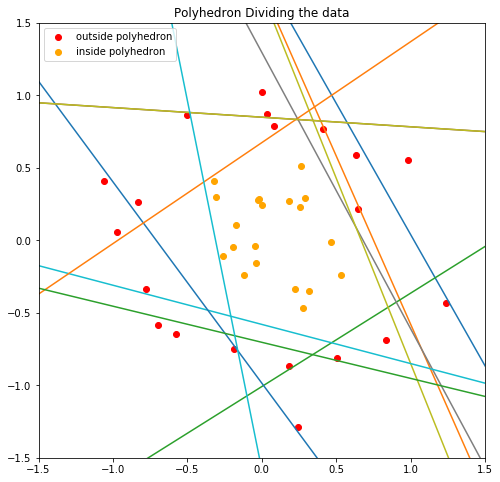

0.6820953354085739


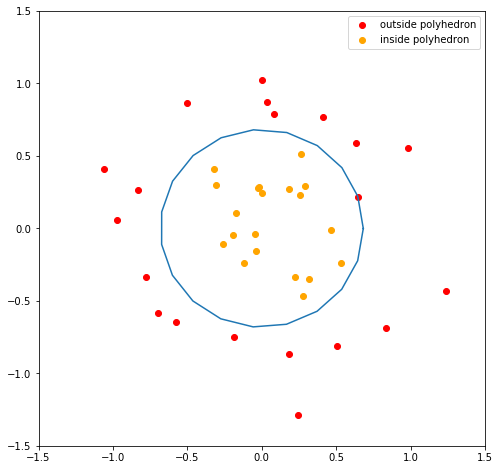

NUMBER OF valid =  20


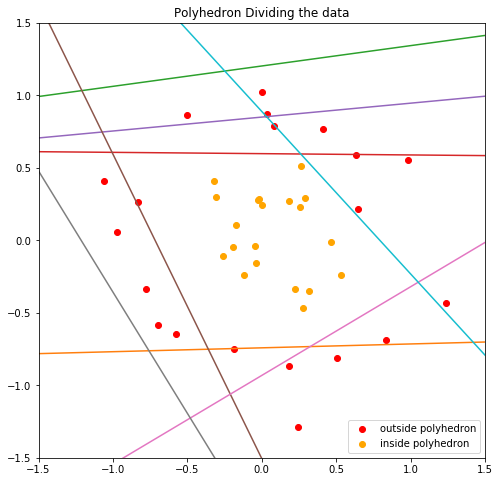

In [8]:
class PolyhedronSolver(Polyhedron):
    def __init__(self):
        super(PolyhedronSolver,self).__init__()
        pass

    def plot(self):
        fig = plt.figure(figsize=(8,8)) # Create 8x8 inches figure  
        ax = fig.add_subplot(111) # Create a graph inside the figure
        ax.scatter(self.S1[:,0],self.S1[:,1],c="red",label="outside polyhedron") # Plot S1
        ax.scatter(self.S2[:,0],self.S2[:,1],c="orange",label="inside polyhedron") # PlotS2

#        Ax + By = C  ==> y = mx + c 
        m = -self.A/self.B
        c = self.C/self.B
        
        x = np.linspace(-10,10,100)
        
        for i in range(len(m)) :
            ax.plot(x,m[i]*x+c[i])

        ax.set_title("Polyhedron Dividing the data")
        plt.legend()
        try : 
            plt.axis(ax.set(xlim=[-1.5,1.5], ylim=[-1.5,1.5]))
        except : 
            pass 
        plt.show()
        
    def plot_2(self) : 
        fig = plt.figure(figsize=(8,8)) # Create 8x8 inches figure  
        ax = fig.add_subplot(111) # Create a graph inside the figure
        ax.scatter(self.S1[:,0],self.S1[:,1],c="red",label="outside polyhedron") # Plot S1
        ax.scatter(self.S2[:,0],self.S2[:,1],c="orange",label="inside polyhedron") # PlotS2
#         circle1 = plt.Circle((0,0), self.R, color='r', fill = False)
#         ax.add_artist(circle1)
        
        ax.plot(self.points[:,0], self.points[:,1])
        
        plt.legend()
        try : 
            plt.axis(ax.set(xlim=[-1.5,1.5], ylim=[-1.5,1.5]))
        except : 
            pass 
        plt.show()
        


    def solve(self):
        
        num_lines = 20 
#         for num_lines in range(3,21) : 
#         print("NUM_LINES", num_lines)
        A = cp.Variable(num_lines)
        B = cp.Variable(num_lines)
        C = cp.Variable(num_lines)
        S = cp.Variable(self.S2.shape[0])
        Y = cp.Variable((len(self.S1),num_lines), boolean = True)

        obj = cp.Minimize(sum(S))

        constraints = [] 

        constraints.append(S>=0)

        for i in range(len(self.S2)) : 
            for j in range(num_lines) : 
                constraints.append(A[j] * self.S2[i,0] + B[j] * self.S2[i,1] + 0.001 <= C[j] + S[i])

        for i in range(len(self.S1)) : 
            for j in range(num_lines) : 
                constraints.append(A[j] * self.S1[i,0] + B[j] * self.S1[i,1] >= 0.001 + C[j] - Y[i,j] * 100)

            constraints.append(cp.sum(Y[i,:]) <= num_lines-1)
            constraints.append(cp.sum(Y[i,:]) >= 17)
#                 constraints.append(cp.sum(Y[i,:]) >= num_lines-3)

        prob = cp.Problem(obj, constraints)

        result = prob.solve(solver = cp.ECOS_BB)

#         print("A =>", A.value,"B =>", B.value,"C =>", C.value,"Y =>", Y.value, "S =>", S.value)
        print(prob.status)
#         if prob.status+ == "optimal" : 
        self.A = []
        self.B = []
        self.C = []

        for i in range(num_lines) : 
            try: 
                temp = np.abs(A.value[i] + B.value[i] + C.value[i]) * 4  
            except  :
#                 print(i)
                continue 
            self.A.append(A.value[i])
            self.B.append(B.value[i])
            self.C.append(C.value[i])
#         print("NUMBER OF LINES = ", num_lines ) 

        self.A = np.array(self.A)
        self.B = np.array(self.B)
        self.C = np.array(self.C)

#                 break
#         print(result)


        return 
    
    def solve_2(self) : 
        
        R = cp.Variable()
        
        obj = cp.Maximize(R) 
        
        constraints = [] 
        
        for i in range(len(self.S1)) : 
#             print(cp.norm(self.S1[i]))
            constraints.append(cp.norm(self.S1[i]) >= R)
            
        prob = cp.Problem(obj, constraints)
        result = prob.solve(solver = cp.GLPK_MI)
        
        print(R.value)
        
        self.R = R.value
        theta_list = np.linspace(0,6.28,20)
        points = [] 
        for i in theta_list : 
            x = R.value * np.cos(i)
            y = R.value * np.sin(i)
            points.append([x,y])
            
        self.points = np.array(points)  
        
    def solve_3(self):
        
        num_lines = 20 
        A = cp.Variable(num_lines)
        B = cp.Variable(num_lines)
        C = cp.Variable(num_lines)
        x = cp.Variable((num_lines,self.S2.shape[0]), integer=True)
        y = cp.Variable((num_lines,self.S1.shape[0]), integer=True)
        
        obj_fun = sum(x[i,j] for i in range(num_lines) for j in range(self.S2.shape[0]))
        obj = cp.Minimize(obj_fun)
        
        constraints = []
        
        constraints.append(x>=0)
        constraints.append(x<=1)
        constraints.append(y>=0)
        constraints.append(y<=1)
        
        for i in range(num_lines) : 
            for j in range(self.S2.shape[0]) : 
                constraints.append(A[i]*self.S2[j,0] + B[i]*self.S2[j,1] + C[i] <= x[i,j]*100)
                
        for i in range(num_lines) : 
            for j in range(self.S1.shape[0]) : 
                constraints.append(A[i]*self.S1[j,0] + B[i]*self.S1[j,1] + C[i] >= -y[i,j]*100)
        
        for j in range(self.S1.shape[0]) : 
            temp = 0
            for i in range(num_lines) : 
                temp += y[i,j]
            constraints.append(temp <= num_lines-1)
            constraints.append(temp >= 17)
        
        prob = cp.Problem(obj, constraints)
        result = prob.solve(solver=cp.ECOS_BB)
        
        self.A = []
        self.B = []
        self.C = []

        for i in range(num_lines) : 
            try: 
                temp = np.abs(A.value[i] + B.value[i] + C.value[i]) * 4  
            except  :
                print(i)
                continue 
            self.A.append(A.value[i])
            self.B.append(B.value[i])
            self.C.append(C.value[i])
        print("NUMBER OF valid = ", len(self.A) ) 

        self.A = np.array(self.A)
        self.B = np.array(self.B)
        self.C = np.array(self.C)
                
        return 
                
        

solver = PolyhedronSolver()

solver.solve()
solver.plot()

solver.solve_2()
solver.plot_2()

solver.solve_3()
solver.plot()


## Question-3  Largest Ball in a polyhedron

Find the largest ball 
$$ B(x_c, R) = \{ x :  ||x − x_c|| ≤ R \}$$
enclosed in a given polyhedron
$$ P = \{ x | a_i^T x ≤ b_i, i = 1, . . . , m\} $$

- The problem variables are the center x<sub>c</sub> ∈ R<sub>n</sub> and the radius R of the ball.

- The class CircleSolver inherits the CircleSolver class. You need to make changes only to the CircleSolver class. Write function `plot` to plot the polyhedron and the circle. Write function `solve` to create our own solver, the function can get the polyhedron as the input as should return a tuple (center,radius) where center is 1x2 numpy array containing the center of the circle, and radius is a scalar value containing the largest radius of the possible. 

In [9]:
class CircleInPolygon():
  def __init__(self):
     super(CircleInPolygon,self).__init__()
     self.polygon = np.random.random((10,2))
     self.polygon = self.polygon[ConvexHull(self.polygon).vertices,:] # A polygon is stored here

**Write the formulation of problem here**

Let number of vertices of polygon be M.

A dimensions => $M$\*$2$

C dimensions => $M$\*$1$

#### Objective  : $$max(R)$$
#### Constraints : 

$$ ( C[i] - A[i]^T * x_c ) \ge || A ||_2 * R$$ $$\forall \: i \: \in [1, M] $$

[[0.1288059  0.01742226]
 [0.57966494 0.08618032]
 [0.74324425 0.42043201]
 [0.9582009  0.9354723 ]
 [0.9333712  0.97149033]
 [0.05728361 0.73657122]
 [0.06968905 0.0433546 ]]
A ->  [[  0.15250455  -1.        ]
 [  2.04336176  -1.        ]
 [  2.39601926  -1.        ]
 [  1.45060258   1.        ]
 [ -0.26814569   1.        ]
 [-55.88007989  -1.        ]
 [ -0.43866223  -1.        ]]
C ->  [ 2.22122189e-03  1.09828486e+00  1.36039552e+00  2.32544101e+00
  7.21210867e-01 -3.93758410e+00 -7.39245486e-02]
optimal
[0.33616428] [0.39809464 0.47991825]


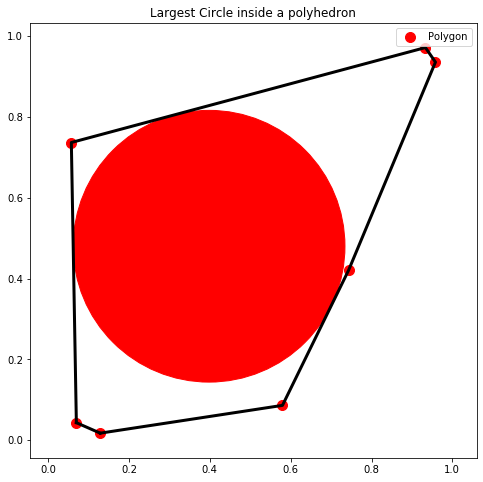

In [10]:
# Create your circle puzzle solver here
class CircleSolver(CircleInPolygon):
  def __init__(self):
     super(CircleSolver,self).__init__()


  def plot(self):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.plot(self.polygon[:,0],self.polygon[:,1],linewidth=3,c="black") # Plot the points
    ax.plot([self.polygon[0,0],self.polygon[-1,0]],[self.polygon[0,1],self.polygon[-1,1]],linewidth=3,c="black") # Plot the edges
    ax.scatter(self.polygon[:,0],self.polygon[:,1],s=100,c="red",label="Polygon") # Plot the edge connecting last and the first point

    circle1 = plt.Circle(self.c, self.R, color='r')
    ax.add_artist(circle1)
    
    ax.set_title("Largest Circle inside a polyhedron")
    plt.axis('equal')
    plt.legend()
    plt.show()


  def solve(self):
    
    print(solver.polygon)
    c = cp.Variable(2)
    R = cp.Variable(1)
    
    obj = cp.Maximize(R)
    
    # Create A matrix from given points 
    A = []
    C = [] 
    for i in range(len(self.polygon)):
        x1, x2, x3 = self.polygon[i,0], self.polygon[(i+1)%len(self.polygon),0], self.polygon[(i+2)%len(self.polygon),0] 
        y1, y2, y3 = self.polygon[i,1], self.polygon[(i+1)%len(self.polygon),1], self.polygon[(i+2)%len(self.polygon),1]
        a = (y1-y2)/(x2-x1)
        b = 1 
        cv = a * x2 + b * y2  
        temp = a * x3 + b * y3
        if temp >= cv : 
            a = -a 
            b = -b
            cv = -cv 
        
        A.append([a,b])
        C.append(cv)

    
    A = np.array(A)
    C = np.array(C)
    
    print("A -> ", A)
    print("C -> ", C)
    
    constraints = []
#     constraints.append(R>=0)
#     Enforcing radius doesn't stretch outside polygon 
    for i in range(len(A)) : 
        constraints.append(C[i]-(A[i] @ c) >= np.sqrt(A[i,0] * A[i,0] + A[i,1]*A[i,1]) * R )
                           
    prob = cp.Problem(obj, constraints)
    result = prob.solve()
    
    print(prob.status)
    
    print(R.value, c.value)
    
    self.R = R.value
    self.c = c.value
    
    pass

solver = CircleSolver()
# solver.polygon =  np.array([[0.39099932, 0.00780111],
#  [0.955381,   0.16460177],
#  [0.38258216, 0.90428554],
#  [0.01145716, 0.79852939],
#  [0.04663332, 0.22219788]])
solver.solve()
solver.plot()

## Question-4 Illumination Problem 


We consider an illumination system of m lamps, at positions l<sub>1</sub>, . . . , l<sub>m</sub> ∈ R<sup>2</sup>, illuminating n flat patches. 
The patches are line segments; the ith patch is given by $$[v_i, v_i+1]$$ where v<sub>1</sub>, . . . , v<sub>n+1</sub> ∈ R<sup>2</sup>. The variables in the problem are the lamp powers p<sub>1</sub>, . . . , p<sub>m</sub>, which can vary between 0 and 1.
The illumination at (the midpoint of) patch i is denoted I<sub>i</sub>. We will use a simple model for the illumination:


   $$Ii = \sum_{j=1}^m a_{ij}p_{j} $$
   $$ a_{ij} = r_{ij} ^{−2} ( max(cos θ_{ij},0) )$$
where r<sub>ij</sub> denotes the distance between lamp j and the midpoint of patch i, and θ<sub>ij</sub> denotes the angle between the upward normal of patch i and the vector from the midpoint of patch i to lamp j. 

![alt text](https://drive.google.com/uc?id=1ZyHm9hmKKZRvLryNkiixTEMTCxZts0qH)

This model takes into account “self-shading” (i.e., the fact that a patch is illuminated only by lamps in the halfspace it faces) but not shading of one patch caused by another. Of course we could use a more complex illumination model, including shading and even reflections. This just changes the matrix relating the lamp powers to the patch illumination levels.

The problem is to determine lamp powers that make the illumination levels close to a given desired illumination level Ides, subject to the power limits 0 ≤ p<sub>i</sub> ≤ 1. Suppose we use the maximum deviation

####   $$ φ(p) = max_{k=1,...,n} |I_{k} − I_{des}| $$
as a measure for the deviation from the desired illumination level. Formulate the illumination problem using this criterion as a linear programming problem.

Create the data using the $Illumination$ class and solve the problem using IlluminationSolver class. 
The elements of A are the coefficients a<sub>ij</sub> in the above equation. 

Compute a feasible p using this first method, and calculate φ(p)



In [11]:
class Illumination():
  def __init__(self):
    super(Illumination,self).__init__()

    # Lamp position
    self.Lamps = np.array([[0.1 ,0.3, 0.4, 0.6 ,0.8 ,0.9 ,0.95],[1.0, 1.1, 0.6 ,0.9, 0.9 ,1.2, 1.00]])
    self.m = self.Lamps.shape[1]    # number of lamps

    # begin and endpoints of patches  
    self.patches = [np.arange(0,1,1/12),np.array([0 ,0.1 ,0.2, 0.2, 0.1, 0.2 ,0.3 ,0.2 ,0 ,  0 ,  0.2, 0.1])]
    self.patches = np.array(self.patches)
    self.n = self.patches.shape[1] -1  # number of patches

    # desired illumination
    Ides = 2;

    # construct A
    self.dpatches = self.patches[:,1:] - self.patches[:,:-1];  # tangent to patches
    self.patches_mid = self.patches[:,1:] - 0.5*self.dpatches;         # midpoint of patches
    A = np.zeros((self.n,self.m));
    for i in range(self.n):
      for j in range(self.m):
        dVI = self.Lamps[:,j]-self.patches_mid[:,i] # Find the distance between each lamp and patch 
        rij = np.linalg.norm(dVI,ord=2) # Find the radius/distance between lamp and the midpoint of the patch 
        normal = null_space(self.dpatches[:,i].reshape(1,2)) # Find the normal

        if normal[1] < 0: # we want an upward pointing normal  
          normal = -1*normal
        A[i,j] = dVI.dot(normal)/(np.linalg.norm(dVI,ord=2)*np.linalg.norm(normal,ord=2))/(rij**2); # Find A[i,j] as defined above
        if A[i,j] < 0: 
          A[i,j] = 0

    self.A = A

**Write the formulation of problem here**

Let number of lamps be M.

#### Problem  : 
#### Objective :
$$Minimize ( max ( abs ( \sum_{j=1}^m a_{ij}p_{j} - I_{des}))) $$$$\forall:\ i:\ \in[1,M]  $$

#### Constraints : 
$$ 0 \le p[i] \le 1 $$ $$ \forall:\ i:\ \in[1,M] $$ 
        
Therefore we need to just minimize the maximum deviation from desired I. Find scalar p for all lamps to give required combination, such that 0<=p<=1. 
We did not have to convert abs to two different constraints in this implementation as cp.abs was able to process our constraint directly.

1.0910372833138409
LAMP values [1.         0.66370061 0.         0.         0.         0.26521747
 1.        ]


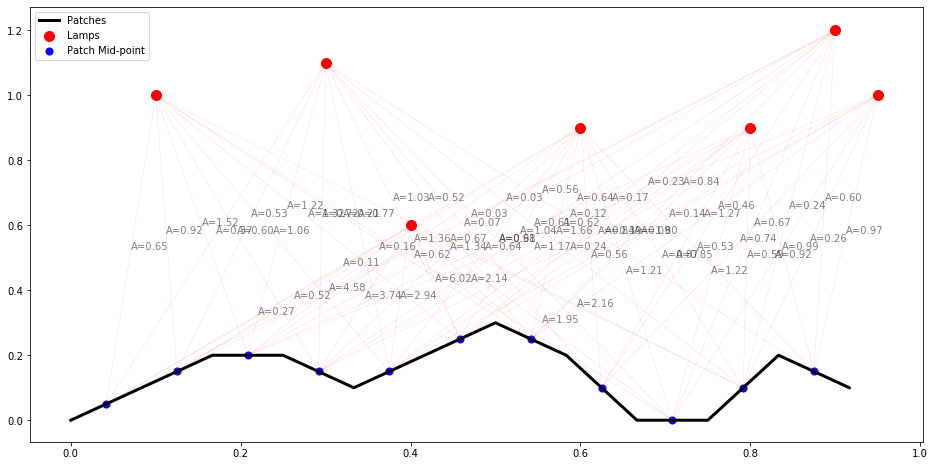

In [12]:
# Create your illumination solver here
class IlluminationSolver(Illumination):
  def __init__(self):
    super(IlluminationSolver,self).__init__()

  def plot(self):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
     
    ax.scatter(self.Lamps[0,:],self.Lamps[1,:],s=100,c="red",label="Lamps") # Lamps
    ax.scatter(self.patches_mid[0,:],self.patches_mid[1,:],s=50,c="blue",label="Patch Mid-point") # Lamps
    ax.plot(self.patches[0,:],self.patches[1,:],linewidth=3,c="black",label="Patches") # Patches

    # Normal joining lamps and patchs 
    for i in range(self.n):
      for j in range(self.m):
        if self.A[i,j] > 0:
          ax.plot([self.Lamps[0,j], self.patches_mid[0,i]],[self.Lamps[1,j], self.patches_mid[1,i]],'r--',linewidth=0.1,alpha=1)
          ax.text((self.Lamps[0,j]+self.patches_mid[0,i])/2,(self.Lamps[1,j] + self.patches_mid[1,i])/2,"A={0:.2f}".format(self.A[i,j]),alpha=0.5)

    plt.legend()
    plt.show()
  
  def solve(self):
    
    p = cp.Variable(self.m) # number of lamps 
    
    current_I = self.A @ p
    
    obj = cp.Minimize(cp.max(cp.abs(current_I - 2)))
    
    constraints = [
        p >= 0 , 
        p <= 1 ,
#         self.A[i] * p[i] <= e for i in range(self.m),
#         self.A[i] * p[i] >= -e for i in range(self.m),
    ]

    prob = cp.Problem(obj,constraints)
    result = prob.solve(solver = cp.GLPK_MI)
    print(result)
    print("LAMP values", p.value)
    
    pass

solver = IlluminationSolver()
solver.solve()
solver.plot()


## Question-5 Jigsaw 

Solving jigsaw puzzles computationally remains a relevant and intriguing problem noted for its applications to real-world problems. 

In this problem, you'll implement a solver that solves jigsaw puzzles using linear programming. 

The current problem requires you to only solve Type I problems (i.e. problems where the orientation of the pieces is known).

You may refer to this paper [Solving Jigsaw Puzzles with Linear Programming](https://arxiv.org/abs/1511.04472) for implementation details. 

![alt text](https://drive.google.com/uc?id=19MyWwH6XV4jz244E5yBJAH0baZAXddVx)

- Jigsaw class will take an image as input and will create a random jigsaw puzzle. Function patches2image will reconstruct the image back from the patches

- The class JigsawSolver inherits the Jigsaw class. You need to make changes only to the JigsawSolver class. Write function `solve` to create our own solver, the function can get a numpy array of shape RxCxHxWx3 as input, where R & C are the number of  rows and cols in the jigsaw puzzle respectively and HxW is the height and width of each peice. The output of the function should be a numpy array of shape RxCxHxWx3 which would be the solution.  

In [13]:
class Jigsaw():
  def __init__(self,path=None):
    super(Jigsaw,self).__init__()
    """
      Initialize your Jigsaw puzzle, you can provide path to an image or we will load the default image
    """
    if path is None:  # Load default image  
      with cbook.get_sample_data('grace_hopper.png') as image_file:
        self.image = plt.imread(image_file)
    else:
      self.image = plt.imread(path)  # Load image of your choice

    self.original_size = self.image.shape[0:2] #Store the original size of the image
    self.new_size = (500,500) # Store new image size, 500x500
    self.rows = 5 # number of rows in jigsaw puzzle
    self.cols = 5 # number of cols in jigsaw puzzle

    # RxCxHxWx3 numpy array storing the jigsaw puzzle
    self.jigsaw = self.create_jigsaw_puzzle(self.image,self.new_size,self.rows,self.cols)

  
  def image2patches(self,image,new_size,rows,cols):
    """
      This function converts an image to patches for jigsaw puzzle
      @param: image -> input image
      @param: new_size -> shape to which image will be resized
      @param: rows -> number of rows in the jigsaw puzzle
      @param: rows -> number of cols in the jigsaw puzzle

      @returns: patches -> RxCxHxWx3 numpy array storing the jigsaw puzzle's patches
    """

    image = resize(image,self.new_size) # resize the original image 
    patches = np.zeros((self.rows,self.cols,self.new_size[0]//self.rows,self.new_size[1]//self.cols,3)) # store the jigsaw puzzle here
    for i in range(self.rows): # for every row of jigsaw
      for j in range(self.cols): # for every col of jigsaw
        patches[i,j,:,:,:] = self.image[i*self.new_size[0]//self.rows:(i+1)*self.new_size[0]//self.rows,j*self.new_size[0]//self.cols:(j+1)*self.new_size[0]//self.cols,:]
    return patches 

  def patches2image(self,patches,original_size):
    """
      This function recreates images from patches
      @param: patches -> RxCxHxWx3 numpy array storing the jigsaw puzzle's patches
      @param: orignal_size -> shape to which image will be resized

      @returns: image -> output image 
    """
    R,C,H,W,_ = patches.shape
    image = np.zeros((R*H,C*W,3))
    for i in range(R):
      for j in range(C):
        image[i*H:(i+1)*H,j*W:(j+1)*W,:] = patches[i,j,:,:,:] 
    
    image = resize(image,original_size) 
    return image 

  def create_jigsaw_puzzle(self,image,new_size,rows,cols):
    patches = self.image2patches(image,new_size,rows,cols)
    R,C,H,W,_ = patches.shape
    patches = patches.reshape((-1,H,W,3))
    patches = patches[np.random.permutation(R*C),...].reshape((R,C,H,W,3))
    return patches

**Write the formulation of problem here**

Problem : 

    minimize   sum(for all (i, j, o) in A) w_ijo * h_ijo
    subject to h_ijo >= x_i  - x_j - delta_o^x
               h_ijo >= -x_i + x_j + delta_o^x  for (i,j,o) in active list A
               
w_ijo is large when the match is good. Therefore the best way to minimize is to make h_ijo = 0 which happens when two pieces are oriented properly with respect to each other.   

W = ($M$\*$N$)x($M$\*$N$)x num_orientations 

D = ($M$\*$N$)x($M$\*$N$)x num_orientations

A = ($M$\*$N$)x num_orientations

dimensions of h_x and h_y = dimensions of A

dimensions of x,y = $M$\*$N$

Steps: 

1) Calculate d_ijo for all images. get_mgc() function used to fill up D.

2) Calculate w_ijo using d_ijo. get_weights() function used to fill up W.

3) Get A matrix using D.

4) For tuples in A formulate problem as  shown above using CVXPY, and solve. 

5) Plot solution.

optimal


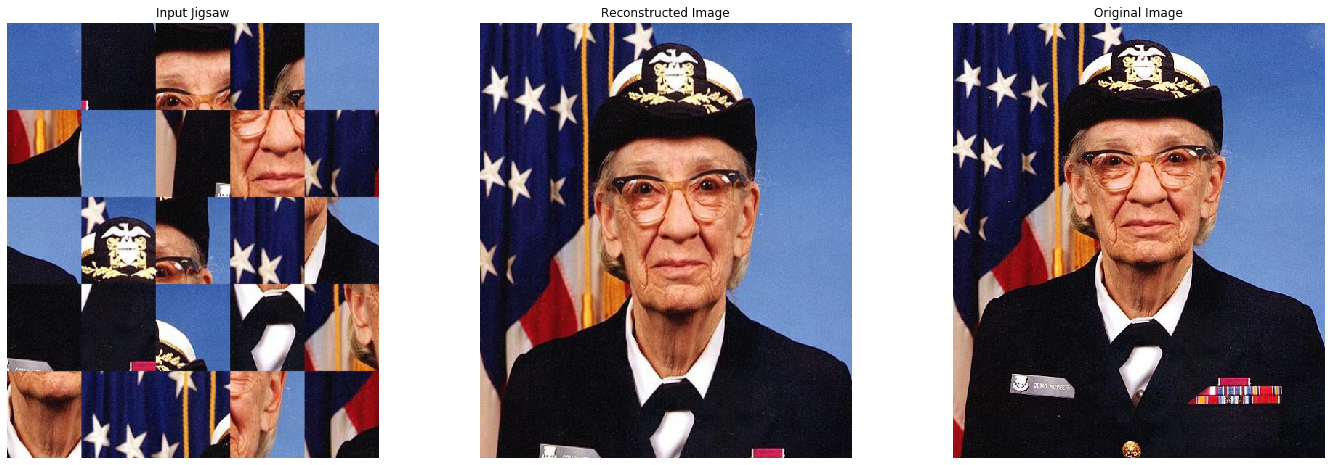

In [15]:
from scipy.spatial.distance import mahalanobis

class JigsawSolver(Jigsaw):
    def __init__(self,*args,**kwargs):
        super(JigsawSolver,self).__init__()
        self.number_of_orientations = 4 
        self.delta_x_o = [0, -1, 0, 1]
        self.delta_y_o = [1, 0, -1, 0]
        self.mgc_num_rot = [3, 0, 1, 2]

        pass

    def plot(self):
        fig = plt.figure(figsize=(24,8))
        ax1 = fig.add_subplot(131)
        ax1.imshow(self.patches2image(self.jigsaw,self.original_size))
        ax1.axis('off')
        ax1.set_title("Input Jigsaw")

        #     Create your plot here
        ax2 = fig.add_subplot(132)
        ax2.imshow(self.patches2image(self.solved, self.original_size))
        ax2.axis('off')
        ax2.set_title("Reconstructed Image")


        ax3 = fig.add_subplot(133)
        ax3.imshow(self.image)
        ax3.axis('off')
        ax3.set_title("Original Image")

        plt.show()


    def mgc(self,i, j, o):

        image1 = self.jigsaw[int(i/self.jigsaw.shape[0]), i%self.jigsaw.shape[1]]
        image2 = self.jigsaw[int(j/self.jigsaw.shape[0]), j%self.jigsaw.shape[1]]
        num_rotations = self.mgc_num_rot[o]

        image1 = np.rot90(image1, num_rotations)
        image2 = np.rot90(image2, num_rotations)

        gradient_im1 = image1[:, -1] - image1[:, -2]
        mean_grad_im1 = gradient_im1.mean(axis=0)

        s = np.cov(gradient_im1.T) + np.eye(3) * 10e-6

        gradient_im12 = image2[:, 1] - image1[:, -1]

        return sum(mahalanobis(row, mean_grad_im1, np.linalg.inv(s)) for row in gradient_im12)
    
    def get_weight(self,i,j,o,D) : 
        
        M = self.jigsaw.shape[0]
        N = self.jigsaw.shape[1]
        
        min_D_i = 1e30
        min_D_j = 1e30
        
        for i_dash in range(M*N):
            for j_dash in range(M*N): 
                for o_dash in range(self.number_of_orientations) : 
                    if i_dash != i : 
                        if min_D_i >= D[i_dash,j_dash,o_dash] : 
                            min_D_i = D[i_dash,j_dash,o_dash]
                    if j_dash != j : 
                        if min_D_j >= D[i_dash, j_dash, o_dash] : 
                            min_D_j = D[i_dash, j_dash, o_dash]
                            
        W_final = min(min_D_i,min_D_j) / D[i,j,o]
        
        return W_final
                        
        
    def solve(self) : 
        
        M = self.jigsaw.shape[0]
        N = self.jigsaw.shape[1]
        
        D = np.zeros((M*N,M*N,self.number_of_orientations))
        W = np.zeros((M*N,M*N,self.number_of_orientations))
        
        # Get D
        for i in range(M*N) : 
            for j in range(M*N) : 
                for o in range(self.number_of_orientations) : 
                    D[i,j,o] = self.mgc(i,j,o)
        
        # Get W
        for i in range(M*N) : 
            for j in range(M*N) : 
                for o in range(self.number_of_orientations) : 
                    W[i,j,o] = self.get_weight(i,j,o,D)
                        
#         U = list(product(range(self.jigsaw.shape[0] * self.jigsaw.shape[1]), range(self.jigsaw.shape[0] * self.jigsaw.shape[1]), range(self.number_of_orientations)))
        
        # GET Active list
        A = []
        
        for i in range(M*N) : 
            for o in range(self.number_of_orientations) : 
                min_j_val = 1e30
                min_j_tuple = []
                for j in range(M*N) : 
                    if D[i,j,o] <= min_j_val : 
                        min_j_val = D[i,j,o]
                        min_j_tuple = [i,j,o]
                A.append(min_j_tuple)
        
        # SOLVE LPP problem 
        
        d_x = {0:0,1:-1,2:0,3:1}
        d_y = {0:1,1:0,2:-1,3:0}
        
        x = cp.Variable(self.jigsaw.shape[0]*self.jigsaw.shape[1])
        y = cp.Variable(self.jigsaw.shape[0]*self.jigsaw.shape[1])
        
        h_x = cp.Variable(len(A)) 
        h_y = cp.Variable(len(A))
        
        obj_fun = sum((h_x[indx] + h_y[indx]) * W[A[indx][0],A[indx][1],A[indx][2]] for indx in range(len(A))) 
        
        obj = cp.Minimize(obj_fun)
        
        constraints = [] 
        
        for indx in range(len(A)) : 
            constraints.append(h_x[indx] >= x[A[indx][0]] - x[A[indx][1]] - d_x[A[indx][2]])
            constraints.append(h_x[indx] >= -x[A[indx][0]] + x[A[indx][1]] + d_x[A[indx][2]])
            constraints.append(h_y[indx] >= y[A[indx][0]] - y[A[indx][1]] - d_y[A[indx][2]])
            constraints.append(h_y[indx] >= -y[A[indx][0]] + y[A[indx][1]] + d_y[A[indx][2]])
            
        prob = cp.Problem(obj, constraints)
        result = prob.solve(solver = cp.ECOS_BB)
        print(prob.status)
#         print("X => ", np.round(x.value))
#         print("Y => ",np.round(y.value))
        
        X = np.round(x.value)
        Y = np.round(y.value)
        
        flattened = []
        for i in range(M):
            for j in range(N):
                flattened.append(self.jigsaw[i][j])
                
        self.solved = np.array(self.jigsaw, copy=True)
        for index in range(len(X)):
#             print(int(Y[index]+2), int(X[index]+2))
            self.solved[int(Y[index])+2, int(X[index])+2] = flattened[index]

        return 

        
solver = JigsawSolver(path=None)
solver.solve()
solver.plot()

## Instructions 
  - For each question you need to write the formulation in markdown and solve the problem using `cvxpy`. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file 
  - Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.